In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip "/content/number_plates.zip"

In [ ]:
!pip3 install easyocr

In [ ]:
!pip3 install torch torchvision torchaudio

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

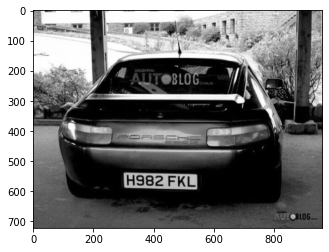

In [ ]:
img = cv2.imread('/content/image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

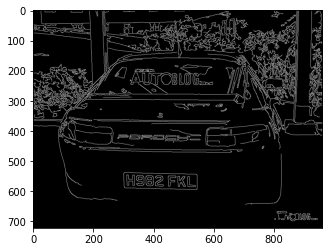

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
# plt.imshow(edged)

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
# contours

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

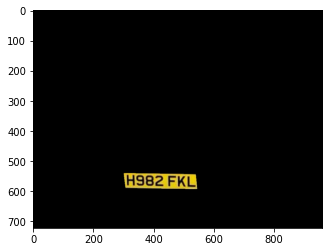

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

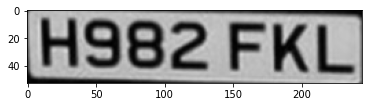

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778851628141)]

In [ ]:
res_set=set()

In [ ]:
res_set.add(''.join(result[0][1].split()))

In [ ]:
res_set

set()

In [ ]:
res_set=set()

def find_plate(img):
  # img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
  edged = cv2.Canny(bfilter, 30, 200) #Edge detection

  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

  location = None
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
        
  mask=None
  if location.all()!=None:
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
  # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    if len(result)!=0:
      res_set.add(result[0][1])

In [ ]:
cap = cv2.VideoCapture("/content/plates.mp4")
frameRate = cap.get(1)
while(cap.isOpened()):
    # frameId = cap.get(1)
    ret, frame = cap.read()
    if (ret != True):
        break
    find_plate(frame)

AttributeError: ignored

In [ ]:
# import glob
# path = "/content/number_plates/*.*"
# for file in glob.glob(path)[10]:
#   find_plate(cap)

In [ ]:
# res_set.add("iu")
res_set

{'H982FKL', 'iu'}